# Listekomprehension

### Snarvei til å lage lister, set og dictionaries

* Liste:
  ```python
  [ uttrykk for element in samling if betingelse]
  ```
  * Set:
  ```python
  { uttrykk for element in samling if betingelse}
  ```
  * Dictionary:
  ```python
  { utrykk_key: uttrykk_value for element in samling if betingelse ]
  ```

Standard måte å lage liste på:

In [1]:
import matplotlib.pyplot as plt
#Plot saldo på sparekonto

def forrentning(P,r,t):
    return P*(1+r)**t

n_tid = 10
start = 1000
rente = 0.05


Med listekomprehensjon

In [2]:
import matplotlib.pyplot as plt
import numpy as np


def forrentning(P,r,t):
    return P*(1+r)**t

n_tid = 10
start = 1000
rente = 0.05


* Ofte er slike listekomprehensjoner lette og lese, skrive og forstå
* Man må passe på ikke ta av -- de kan bli kompliserte og vanskelige å forstå

Man lager `set` på akkura samme måte

In [3]:
import json
with open("kundedata1.json", 'r') as file:
    kundedata = json.load(file)

#Hent alle etternavn
#Hent alle etternavn som begynner på 'H'



In [ ]:

#Kan bli vanskelig å lese eller for komplisert
#Dictionary av alle kunder med etternavn som begynner på 'H'



#Vi gjenbruker heller "finnKunde" funksjonen vår fra tidligere
def finnKunde(etternavn):
    treffliste = []
    for kunde in kundedata:
        if etternavn == kunde["etternavn"]:
            treffliste.append(kunde)
    if treffliste == []:
        print(f"Ingen kunder med etternavn '{etternavn}' funndet")
        return None
    else:
        print(f"Vi fant {len(treffliste)} kunder med etternavn '{etternavn}'")
        return treffliste

#Alle kunder med etternavn H
H_klubben = { navn: finnKunde(navn) for navn in etternavn_H}

#Skriv ut til fil

## Oppg:
* Bruk komprehensjon til å lage en dictionary som inneholder allekunder med startsaldo større enn 120,000
* Dictionary skal bestå av nøkler som tilsvarer etternavnet til kundene, og verdiene skal være en liste med kundene på samme format som originalt

In [4]:
grense = 120e3
#lag liste med rike kunder
#lag set med etternavnene
#lag dictionary med kunder { kundensetternavn: [liste med kunder]}


## Lånekalkulator: Stolpediagram og Kakediagram
* Tidligere lagde vi denne lånekalkulatoren

Hva er ønsket terminbelop? 1000


Gyldig terminbeløp gitt -- kalkulering fortsetter


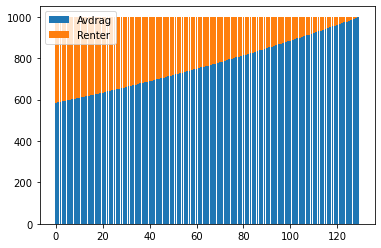

Nedbetalingstiden på 11 år og 10 måneder er for lenge
Renter [4837.334296557354, 4470.878725276828, 4085.6745914802564, 3680.7626831267626, 3255.1347130669888, 2807.730808267409, 2337.436870578584, 1843.081802475325, 1323.4345908604498, 777.2012416704075]


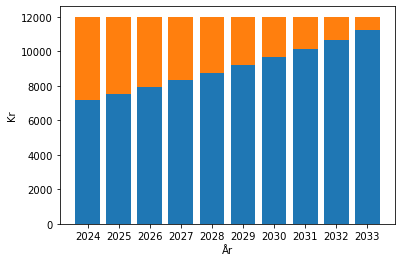

In [6]:
# Annuitetslån
import matplotlib.pyplot as plt

laan = 100000
rentesats = 0.05
terminbelop = float(input("Hva er ønsket terminbelop?"))
max_nedbetalingstid = 10 #år

def sjekk_terminbelop(terminbelop,r,L):
    renter = laan*rentesats/12
    if terminbelop<renter:
        print("Terminbeløpet på", terminbelop, "er for lite")
        print("Første renteavregning er på", renter, "kr")
        return False
    else:
        return True
    
if sjekk_terminbelop(terminbelop, rentesats, laan):
    print("Gyldig terminbeløp gitt -- kalkulering fortsetter")
    avdragsliste = []
    renteliste = []
    mnd = 0
    while laan > 0:
        renter = laan*rentesats/12
        avdrag = terminbelop-renter
        laan = laan - avdrag
        #laan -= termterminbelop
        renteliste.append(renter)
        avdragsliste.append(avdrag)
        mnd += 1
        #mnd = mnd +1

    tid_liste = list(range(mnd))

    plt.bar(tid_liste, avdragsliste, label="Avdrag")
    plt.bar(tid_liste, renteliste, label="Renter", bottom=avdragsliste)
    plt.legend()
    plt.show()
    
    if mnd/12 > max_nedbetalingstid:
        print(f"Nedbetalingstiden på {mnd/12:.0f} år og {mnd%12} måneder er for lenge")
    
    avdrag_aarlig = []
    renter_aarlig = []
    
    n_aar = mnd//12
    aar_liste = list(range(n_aar))
    
    for aar in aar_liste:
        avdrag = avdragsliste[aar*12:(aar+1)*12]
        renter = renteliste[aar*12:(aar+1)*12]
        avdrag_aarlig.append(sum(avdrag))
        renter_aarlig.append(sum(renter))
    
    print("Renter", renter_aarlig)
    
    startaar = 2024
    aarstall_liste = []
    for y in aar_liste:
        aarstall = f"{startaar+y}"
        aarstall_liste.append(aarstall)
        
    plt.bar(aarstall_liste, avdrag_aarlig, label="Avdrag")
    plt.bar(aarstall_liste, renter_aarlig, label="Renter", bottom=avdrag_aarlig)
    plt.xlabel("År")
    plt.ylabel("Kr")
    plt.show()
    
    
else:
    print("Ugyldig terminbeløp gitt -- programmet stopper")






# Oppg: Skriv om lånekalkulator-koden:
* Vi vil dele programmet inn i funksjoner
* Sett sammen programmet på nytt slik at det består av:
  * En funksjon som henter terminbeløp fra bruker
  * En funksjon som sjekker terminbeløp
  * En funksjon som beregner nedbetaling
  * En funksjon som sjekker nedbetalingstiden
  * En funksjon som fremstiller resultat (plotter osv)
  * En funksjon run() som "kjører lånekalkulatoren"